In [21]:
# Cargamos las librerías típicas de python
import matplotlib.pyplot as plt # para plotear
import numpy as np              # numpy para los arrays
import seaborn as sb            # seaborn para plotear más lindo

# Cargamos un módulo de la librería de Tensorflow que contiene el dataset fashion-mnist
from keras.datasets import mnist,fashion_mnist

(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()  # cargo los dataset de entrenamiento y testeo

# defino un vector de categorías donde el índice de cada elemento corresponde a la categoría asociada
categories = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


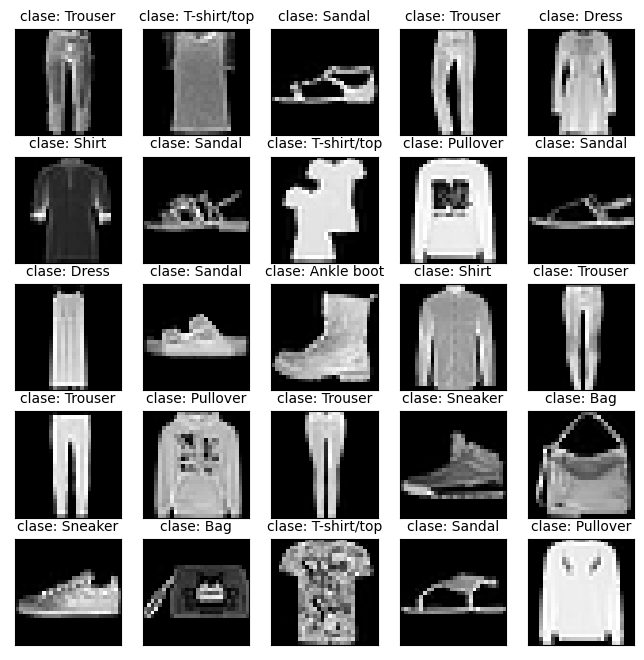

In [23]:
# Ploteo 25 imagenes al azar del set de entrenamiento con sus respectivas clases
fig = plt.figure(figsize = (8,8)) # seteo el tamano de la figura
for i in range(25):
    j = np.random.randint(0, len(X_train_raw)) # en cada iteracion elijo un numero random entre 0 y la longitud de X_train_raw que es 60000 (el numero de imagenes) para usar de indice
    plt.subplot(5,5,i+1) # Voy a tener una matriz de 5x5 subplots y voy llenando en la iteracion i-esima el subplot i+1
    plt.imshow(X_train_raw[j], interpolation='none', cmap="gray") # plotea una imagen random, pues es la imagen j-esima del set de entrenamiento, en formato (28,28) para imagenes en escala de grises
    plt.title("clase: {}".format(categories[y_train[j]]), fontsize = 10) # pongo el titulo a los plots con el nombre de la clase a la que pertenece la imagen y seteo el tamano de letra
    plt.xticks([]) # le saco los ticks en el eje X
    plt.yticks([]) # le saco los ticks en el eje Y
plt.show()

In [25]:
# reshapeamos para obtener un vector de 784 elementos (features) por cada imagen (samples)
X_train = X_train_raw.reshape(60000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones
X_test = X_test_raw.reshape(10000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones

X_train = X_train.astype('float32') # transformamos el tipo de datos a "float32"
X_test = X_test.astype('float32') # transformamos el tipo de datos a "float32"

# normalizamos por el maximo valor que pueden tener los pixels para que los valores queden entre 0 y 1
X_train = X_train/255.0
X_test = X_test/255.0

# print the final input shape ready for training
print("Matriz de entrenamiento shape", X_train.shape)
print("Matriz de testeo shape", X_test.shape)

Matriz de entrenamiento shape (60000, 784)
Matriz de testeo shape (10000, 784)


In [26]:
values,counts = np.unique(y_train, return_counts=True) # me fijo los valores sin repetir que toma el vector "y" y cuantas veces aparece cada uno con 'return_counts=True'
print("y_train")
print("Values:", values)
print("Counts:", counts)
print("y_test")
values,counts = np.unique(y_test, return_counts=True)
print("Values:", values)
print("Counts:", counts)

y_train
Values: [0 1 2 3 4 5 6 7 8 9]
Counts: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
y_test
Values: [0 1 2 3 4 5 6 7 8 9]
Counts: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from random import shuffle

acc = [] #Donde van a ir los accuracies
indices = np.arange(len(y_test)) #Vector de indices

clf = KNeighborsClassifier(n_neighbors=5) #Clasificador
clf.fit(X_train, y_train) #Una sola vez

for n in np.arange(0,10): #Itero

    print(n) #Para los ansiosos
    shuffle(indices) #Permuto elvector de indices
    X_KNN = X_test[indices[0:100],:] #Los primeros 100 del vector de indices
    y_KNN = y_test[indices[0:100]]

    y_pred = clf.predict(X_KNN) #Predigo Etiquetas
    accuracy = accuracy_score(y_pred, y_KNN) #Accuracy
    acc.append(accuracy) #Guardo

print('Accuracy promedio:', np.mean(accuracy))

0
1
2
3
4
5
6
7
8
9
Accuracy promedio: 0.95
